# Conceptual models of Ocean Circulation

The goal of this notebook is to explore some dynamical mechanisms which could account for internal variability of the ocean: multiple equilibria and transitions between them, and self-sustained oscillations.

To do so we shall only use conceptual or "toy" models based on a simple representation of the ocean as several homogeneous boxes exchanging heat and salinity through a buoyancy-driven circulation. From a technical point of view, this means that we will only study dynamical systems with a few degrees of freedom, rather than the full partial differential equations describing ocean dynamics.

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.integrate import ode

## 1. The Stommel model

### Derivation of the Stommel model

*In this section, we introduce the relevant physical quantities for the model and derive the evolution equation (in non-dimensional form) for the salinity difference. No numerical computations are needed.*



Perhaps the simplest conceptual model of the meridional ocean circulation goes back to Stommel (1961). The model consists of two homogeneous boxes characterized by temperatures $T_1, T_2$ and salinities $S_1, S_2$ (expressed in $g.kg^{-1}$) representing the polar and tropical regions, respectively (see schematic below).

![model](stommel_model.png)

A salt flux $\Sigma$ (in $g.s^{-1}$) is imposed into the tropical box, and the polar box exports the same amount of salt to ensure global salt conservation.
The properties of the two ocean boxes are mixed by the overturning circulation.
We denote $m$ the flow rate (in $m^3.s^{-1}$) in the surface branch of the overturning circulation.
To ensure global mass conservation, the return flow at the bottom of the ocean must have the same flow rate $m$.
As far as the mixing of water mass properties (temperature, salinity) are concerned, the direction of the overturning circulation (northwards surface flow and southwards bottom flow, or the converse) does not matter. Hence $m$ will always be a positive quantity here. 

Assuming that both boxes have the same volume $V$, the equations for conservation of salt mass and total mass can be combined to yield the evolution equation for salinity in each box:
\begin{align*}
\frac{dS_1}{dt} &= -\frac{\Sigma}{\rho_0 V}+ \frac{m}{V} (S_2-S_1),\\
\frac{dS_2}{dt} &= \frac{\Sigma}{\rho_0 V}+ \frac{m}{V} (S_1-S_2),\\
\end{align*}
and for the salinity difference $\Delta S=S_2-S_1$:
\begin{align*}
\frac{d\Delta S}{dt} &= \frac{2\Sigma}{\rho_0 V}-\frac{2m}{V}\Delta S,
\end{align*}
with $\rho_0$ a reference density for seawater.
We use a linear equation of state for seawater: $\rho=\rho_0\lbrack 1-\alpha (T-T_0)+\beta(S-S_0)\rbrack$.

The temperature difference $\Delta T=T_2-T_1$ is assumed constant.

Several choices for the overturning circulation flow rate $m$ can be made. The original paper by Stommel assumes that it is proportional to $|\Delta \rho|=|\rho_2-\rho_1|$. Here, following Cessi (1994), we adopt the model $\frac{2m}{V} = \frac{1}{t_d}+\frac{q}{V}\frac{(\Delta \rho)^2}{\rho_0^2}$, where $t_d$ is a diffusion time and $q$ an empirical transport coefficient.

Introducing the non-dimensional variable $y=\frac{\beta \Delta S}{\alpha \Delta T}$ and rescaling time with the diffusive time $t_d$, the model reduces to:
\begin{equation*}
\dot{y} = F-y(1+\mu^2(1-y)^2) \equiv f(y),
\end{equation*}
with $F=\frac{2\beta \Sigma t_d}{\alpha \Delta T \rho_0 V}$ and $\mu^2=\frac{q t_d (\alpha \Delta T)^2}{V}$.

**Q.** In the current climate, what is the sign of $F$ and $y$?

**Q.** Show that $\Delta\rho < 0$ if and only if $y< 1$. Where should deep water form when this condition is satisfied? Does it correspond to current climate?

**Q.** Check that $F=0$, $y=0$ and $F=1$, $y=1$ are equilibria of the system, regardless of the value of $\mu$.

Cessi (1994) discusses the estimate of parameter values for the model. We should adopt the same choice here. They are given in the following table:

| Parameter | Value   |  Unit   |
|-----------|---------|---------|
| $\alpha$  | 1e-4    | $K^{-1}$|
| $\beta$   | 7.6e-4  |         |
| $t_d$     | 180     | years   |
| $q$       | 1.92e12 | $m^3.s^{-1}$ |
| $V$       | 11137500| $km^3$  |
| $\Delta T$| 25      | K       |

In [44]:
alpha = 1e-4
beta = 7.6e-4
td = 180*365*24*3600
q = 1.92e12
V = 11137500*1000**3
DeltaT = 25

q*td*(alpha*DeltaT)**2/V

6.116072727272727

### Multiple Equilibria of the Stommel model

**Q1.** How many equilibrium states does the system have at most? Check analytically that there is more than one equilibrium if and only if $\mu^2>3$. 
*No numerical computation is needed.*

**Q2.** Now plot the vector field $f$ as a function of $y$ and $F$, for fixed values of $\mu$ (you can use for instance $\mu=1$, $2$ and $2.5$). For each value of $\mu$, you can use a filled contour plot (`plt.contourf`) to show the values of $f$, and draw on top of it (with `plt.contour`) the contour line $f=0$, which corresponds to the equilibrium states. For each vaue of $\mu$, discuss the number of equilibrium states, their stability, and the direction of the overturning circulation for each of them. You can use the definition of $f$ in the following cell.

In [45]:
def f(t, y, mu, F):
    """ The vector field for the Stommel model """
    return F-y*(1+mu**2*(1-y)**2)

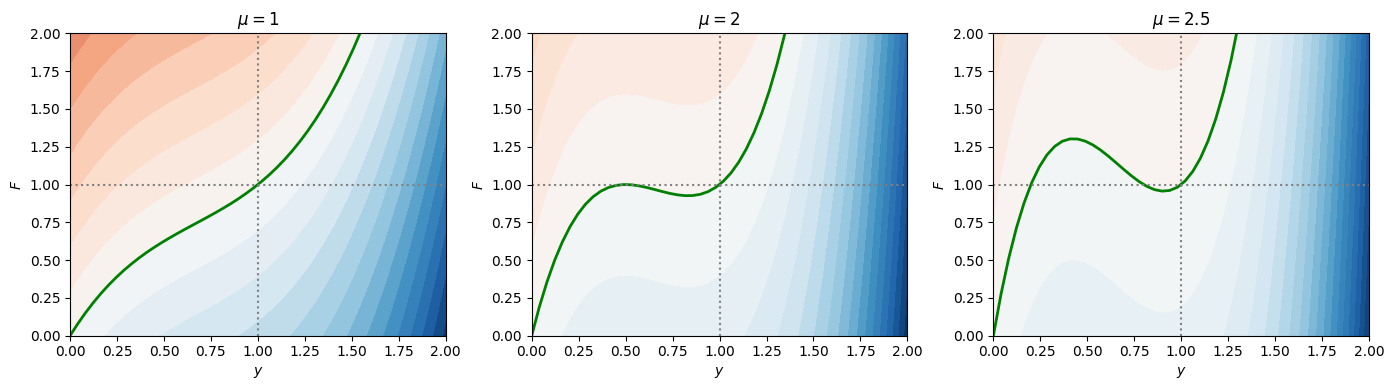

In [46]:
_, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
yvec = np.linspace(0, 2, 50)
Fvec = np.linspace(0, 2, 50)
for mu, ax in zip((1, 2, 2.5), (ax1, ax2, ax3)):
    ax.set_xlabel(r'$y$')
    ax.set_ylabel(r'$F$')
    ax.set_title(r'$\mu=$'+str(mu))
    tab = np.array([[f(0, y, mu, F) for y in yvec] for F in Fvec])
    ax.contourf(yvec, Fvec, tab, 20, cmap='RdBu_r', norm=colors.CenteredNorm())
    ax.contour(yvec, Fvec, tab, [0], colors='green', linewidths=2)
    ax.axvline(x=1, ls='dotted', color='gray')
    ax.axhline(y=1, ls='dotted', color='gray')
plt.tight_layout()

For $\mu=1$, there is always a unique stable equilibrium. As the salt flux increases, there is a smooth transition from a thermal circulation (downwelling where the water is colder) to a haline circulation (downwelling where the water is saltier). The transition occurs for $F=1$.

For $\mu=2$, there is a range of forcings for which the system admits multiple equilibria (two stable ones and an unstable one). However, all these equilibrium states correspond to thermal circulations. Like in the previous case, for $F>1$ we have a transition to a reversed overturning circulation.

For $\mu=3$, the range of bistability is larger and straddles the $F=1$ line. This means that in a certain range of forcing amplitudes, a conventional overturning circulation (corresponding to the equilibrium state with $y<1$) can coexist with a reversed one (corresponding to the equilibrium state with $y>1$).

Note that in each case the stability of the equilibrium state can be seen easily: it is determined by the sign of the derivative of $f$ with respect to $y$. This can be seen graphically: if $f$ is positive left of the equilibrium and negative right of it, it is stable, and unstable in the opposite case.

**Q3.** We are now going to integrate numerically the differential equation defining the model for a range of initial conditions $y_0 \in [0, 2]$ and for different parameter values. Show all the trajectories on the same plot, and make one plot for each value of $F$ in $(0.5, 1, 1.5)$ and $\mu$ in $(1, 2.5)$.

In [47]:
def integrate(model, y0, dt):
    model.set_initial_value(y0, 0)
    yield 0, y0
    while model.t < 10:
        yield model.t, model.integrate(model.t+dt)[0]

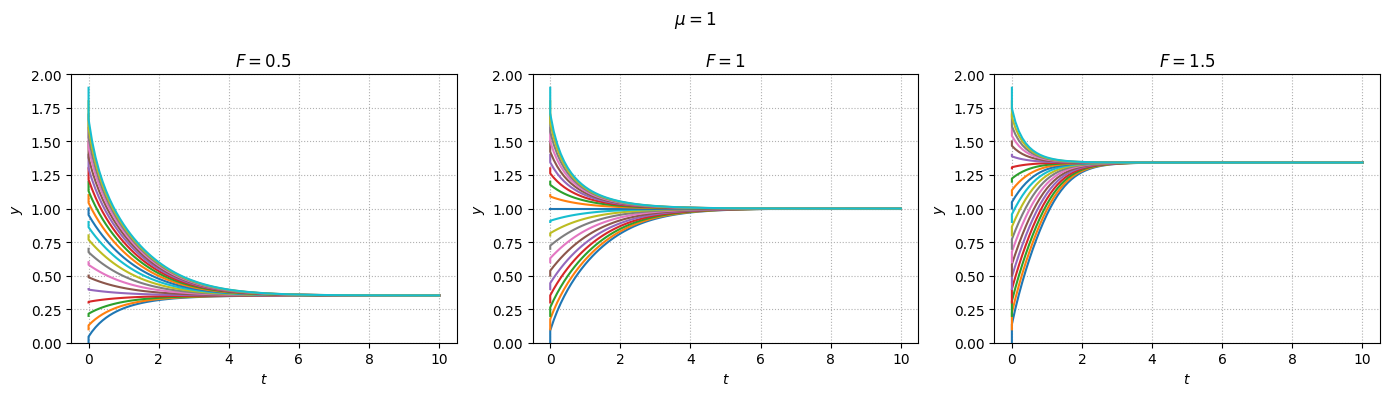

In [48]:
stommel = ode(f)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle(r'$\mu=1$')
for F, ax in zip((0.5, 1, 1.5), (ax1, ax2, ax3)):
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim((0, 2))
    ax.grid(True, ls='dotted')
    ax.set_title(r'$F=$'+str(F))
    stommel.set_f_params(1, F)
    for y0 in np.arange(0, 2, 0.1):
        trajectory = np.array([[t, y] for t, y in integrate(stommel, y0, 0.1)])
        ax.plot(trajectory[:, 0], trajectory[:, 1])
plt.tight_layout()

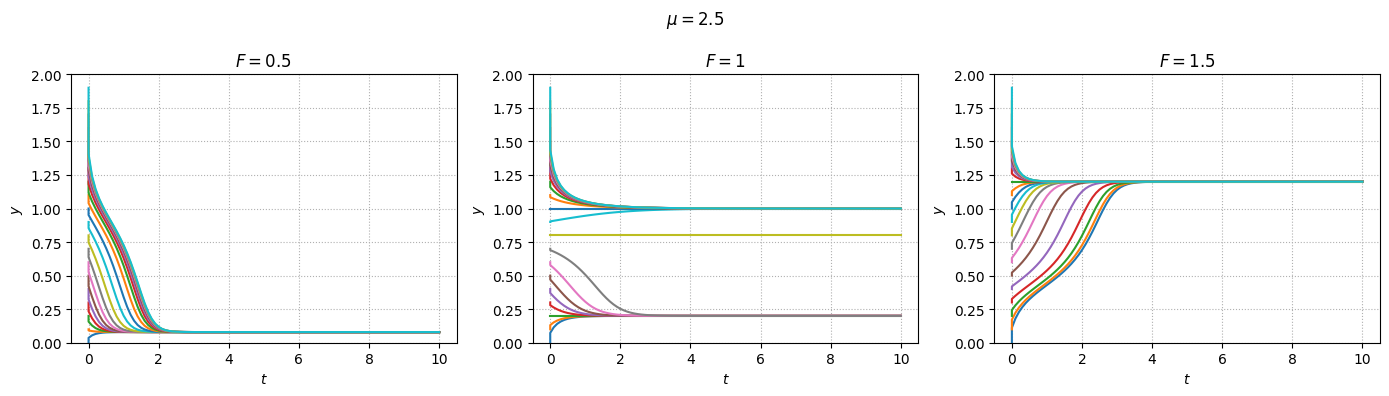

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
fig.suptitle(r'$\mu=2.5$')
for F, ax in zip((0.5, 1, 1.5), (ax1, ax2, ax3)):
    ax.set_xlabel(r'$t$')
    ax.set_ylabel(r'$y$')
    ax.set_ylim((0, 2))
    ax.grid(True, ls='dotted')
    ax.set_title(r'$F=$'+str(F))
    stommel.set_f_params(2.5, F)
    for y0 in np.arange(0, 2, 0.1):
        trajectory = np.array([[t, y] for t, y in integrate(stommel, y0, 0.1)])
        ax.plot(trajectory[:, 0], trajectory[:, 1])
plt.tight_layout()

**Q4.** Now let us do an *hysteresis experiment*: we integrate the differential equation with a time-dependent forcing $F$. If the forcing changes slowly compared to the relaxation time of the system, we should always remain close to equilibriium states. However, if the forcing changes too fast, the system will not be able to track its equilibrium state. This may lead to the so-called *dynamical hysteresis* phenomenon, where the hysteresis loop is larger than what would be obtained with an adiabatic variation of the parameter. 

In [50]:
def hysteresis(model, dt, Fstart, Fend, dF):
    F = Fstart
    model.set_f_params(2, F)
    while F <= Fend:
        yield F, model.integrate(model.t+dt)[0]
        F += dF
        model.set_f_params(2, F)
    while F >= Fstart:
        yield F, model.integrate(model.t+dt)[0]
        F -= dF
        model.set_f_params(2, F)

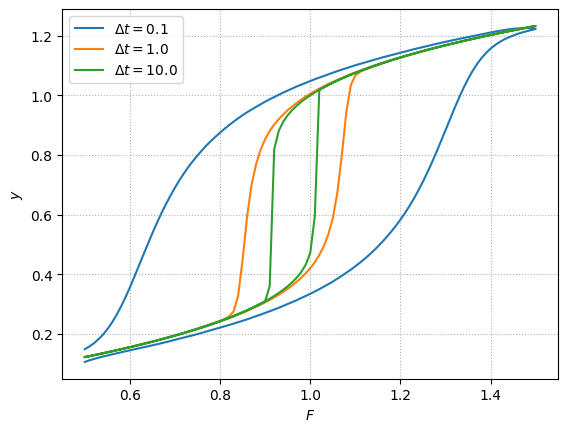

In [51]:
ax = plt.axes(xlabel=r'$F$', ylabel=r'$y$')
ax.grid(True, ls='dotted')
stommel.set_initial_value(0.1, 0)
for deltat in (0.1, 1.0, 10.0):
    trajectory = np.array([(F, y) for F,y in hysteresis(stommel, deltat, 0.5, 1.5, 0.01)])
    ax.plot(trajectory[:, 0], trajectory[:, 1], label=r'$\Delta t=$'+str(deltat))
ax.legend();

## 2. Noise-induced transitions in the Stommel model

We now consider that the freshwater flux can fluctuate. We represent these fluctuations by white noise added to the mean freshwater flux. The new model takes the form of the following *stochastic differential equation*:
\begin{equation*}
dy_t = \lbrack F-y_t(1+\mu^ 2(1-y_t)^2) \rbrack dt + \sqrt{2D}dW_t,
\end{equation*}
where $W$ is a Wiener process, and the diffusion coefficient $D$ controls the amplitude of the fluctuations.

We shall work in the bistability regime with $\mu^2=6.2$ and $F=1.1$. We assume that the fluctuations of the freshwater flux are on the order of 20%: $\sqrt{2D}= 0.2$, i.e. $D=0.02$.

Numerical integration of stochastic differential equations require specific methods. The goal here is not to study these methods, hence we shall simply use an existing python package which implements them. For more information, see https://stochrare.readthedocs.io/en/latest/notebooks/Diffusion1D.html and the reference book by Kloeden and Platen (see the *Further Reading* section at the end of this document).

In [9]:
import stochrare as sr
stommel_stochastic = sr.dynamics.diffusion1d.ConstantDiffusionProcess1D(lambda y, t: f(t, y, np.sqrt(6.2), 1.1), 0.02)

**Q1.** Sample a long (several hundreds of time units) realization of the stochastic process (using the `trajectory` method of the `stommel_stochastic` object). Check that it exhibits transitions between the two stable states. If it does not, sample a new one until it does. Do the transitions appear to occur at regular interval or randomly?

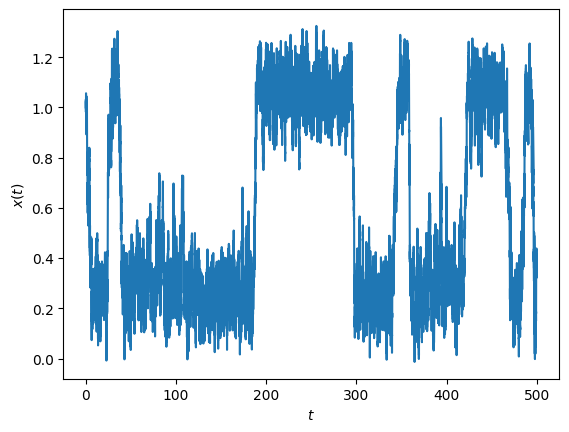

In [52]:
stommel_stochastic.trajectoryplot(stommel_stochastic.trajectory(1, 0, dt=0.01, T=500));

The model above takes the form of a classical problem in statistical physics, corresponding to the dynamics of an overdamped particle in a potential (the vector field $f$ derives from a potential: $f(y)=-V'(y)$ - here it is trivial because the system is 1D). It is a standard exercise to compute the statistical properties of the system, such as for instance the stationary probability density function, or the distribution of transition times.
Let us start with the probability density function $p(y, t)$. It obeys the Fokker-Planck equation:
\begin{equation*}
\frac{\partial p}{\partial t} = \frac{\partial (V'(y) p)}{\partial y}+D\frac{\partial^2 p}{\partial y^2}.
\end{equation*}
It is easily seen that the stationary solution is $p_\infty(y) = Z e^{-\frac{V(y)}{D}}$ where $Z$ is a normalization constant.

**Q2.** Sample numerically the stationary probability density function, and compare it to the theoretical result. To do so, use the definition of the potental in the following cell:

In [64]:
def potential(y, F, mu):
    """ The potential from which the vector field of the Stommel model derives. """
    return y**2/2+mu**2*(y**4/4-2*y**3/3+y**2/2)-F*y

In [82]:
_, y = stommel_stochastic.trajectory(1, 0, dt=0.01, T=1000)

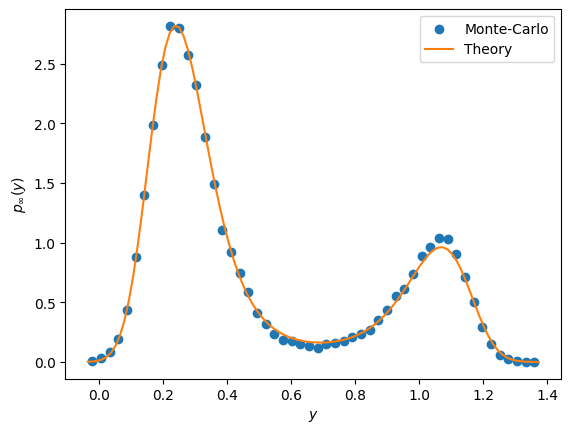

In [95]:
p_num, bin_edges = np.histogram(y, bins='auto', density=True)
yvec = np.linspace(np.min(bin_edges), np.max(bin_edges), num=100)
p_th = np.exp(-potential(yvec, 1.1, np.sqrt(6.2))/0.02)
p_th /= np.trapz(p_th, x=yvec)
ax = plt.axes(xlabel=r'$y$', ylabel=r'$p_\infty(y)$')
ax.scatter(0.5*(bin_edges[1:]+bin_edges[:-1]), p_num, label='Monte-Carlo')
ax.plot(yvec, p_th, label='Theory', color='C1')
plt.legend();

**Q3.** Now we want to study the statistics of the transition time, say for a transition from the "on"-state to the "off"-state of the meridional overturning circulation. We define the *first passage time* as follows:
\begin{equation}
\tau = \inf\{ t>0, y_t > 1 | y_0 = 0.2\}
\end{equation}
Sample numerically many realizations of $\tau$, and compute its probability density function. Compare it to an exponential distribution: $p(\tau)=\lambda e^{-\lambda\tau}$ with a parameter $\lambda$ that you should identify. Again, we shall not write the numerical implementation ourselves: instead use the `FirstPassageProcess` object from the `stochrare` package (you should use its `escapetime_sample` method):

In [91]:
tau = sr.firstpassage.FirstPassageProcess(stommel_stochastic)

In [92]:
tau_samples = tau.escapetime_sample(0.2, 0, 1, ntraj=10000)

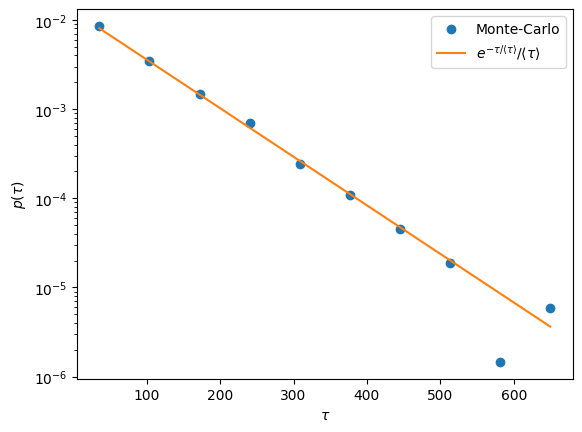

In [100]:
p_tau, bin_edges = np.histogram(tau_samples, density=True)
tau_avg = np.mean(tau_samples)
ax = plt.axes(xlabel=r'$\tau$', ylabel=r'$p(\tau)$', yscale='log')
ax.scatter(0.5*(bin_edges[1:]+bin_edges[:-1]), p_tau, label='Monte-Carlo')
ax.plot(0.5*(bin_edges[1:]+bin_edges[:-1]), np.exp(-0.5*(bin_edges[1:]+bin_edges[:-1])/tau_avg)/tau_avg, label=r'$e^{-\tau/\langle \tau \rangle}/\langle \tau \rangle$', color='C1')
plt.legend();

**Q4.** Is the timescale of transitions obtained with this model compatible with the timescales associated with Dansgaard-Oeschger events?

# Further reading

- Dansgaard-Oeschger events and millenial-scale variability of the meridional overturning circulation: Henk A. Dijkstra, *Nonlinear Climate Dynamics*, Cambridge University Press (2013), chapter 10.
- Numerical methods for integration of stochastic differential equations: P. E. Kloeden and E. Platen, *Numerical Solution of Stochastic Differential Equations*, Springer (2010).
- Diffusion in a potential and first-passage times: C. Gardiner, *Stochastic Methods*, Springer (2009), in particular section 5.5.